# Glioma Grading Clinical and Mutation Features
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data

For this project, we will use the preprocessed data that is given to us. We will start by reading the data and then we will perform some basic operations to understand the data better.

In [2]:
glioma_data = pd.read_csv("TCGA_InfoWithGrade.csv")
accs = []
f1scores = []

### Clinical Features:

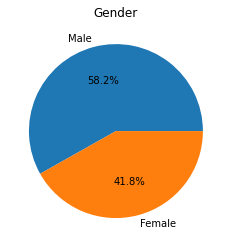

In [3]:
# Generating a pie chart to visualize the distribution of gender in the glioma dataset
plt.figure()
plt.title("Gender")
plt.pie(glioma_data['Gender'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%')
plt.show()

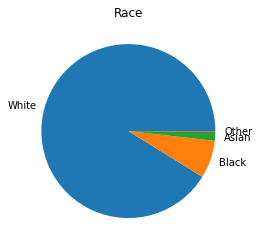

In [4]:
# Generating a pie chart to visualize the distribution of race in the glioma dataset
plt.figure()
plt.title("Race")
plt.pie(glioma_data["Race"].value_counts(),labels=['White','Black','Asian','Other'])
plt.show()


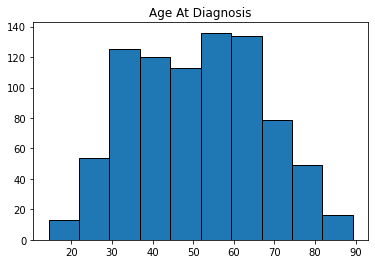

In [5]:
# Generating a pie chart to visualize the age distribution in the glioma dataset
plt.figure()
plt.title("Age At Diagnosis")
plt.hist(glioma_data['Age_at_diagnosis'], bins=10, edgecolor='black')
plt.show()

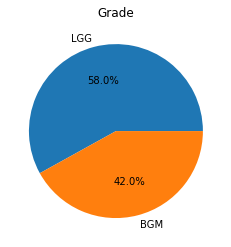

In [6]:
# Generating a pie chart to visualize the distribution of grade in the glioma dataset
plt.figure()
plt.title("Grade")
plt.pie(glioma_data['Grade'].value_counts(), labels=['LGG','BGM'], autopct='%1.1f%%')
plt.show()

### Mutation Features:

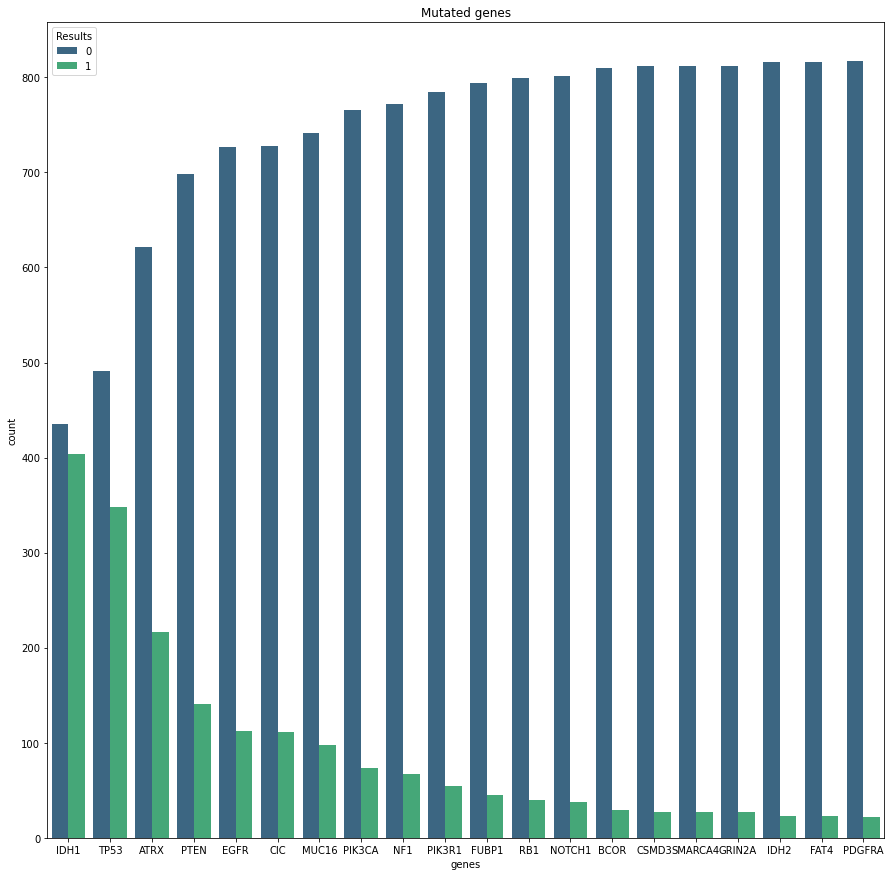

In [7]:
plt.figure(figsize=(15, 15))
plt.title("Mutated genes")

# Selecting specific gene columns from the glioma_data dataset and reshaping it using melt
# This transforms the data from wide format to long format
genes_data=glioma_data[["IDH1",
        "TP53",
        "ATRX",
        "PTEN",
        "EGFR",
        "CIC",
        "MUC16",
        "PIK3CA",
        "NF1",
        "PIK3R1",
        "FUBP1",
        "RB1",
        "NOTCH1",
        "BCOR",
        "CSMD3",
        "SMARCA4",
        "GRIN2A",
        "IDH2",
        "FAT4",
        "PDGFRA"]].melt(var_name="genes",value_name="Results")

# Creating a count plot to visualize the number of mutations per gene
sb.countplot(data=genes_data, x='genes',hue='Results',palette='viridis')
plt.show()

## Separating data into training and test

In [8]:
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



values = glioma_data[
    [
        "Gender",
        "Age_at_diagnosis",
        "Race",
        "IDH1",
        "TP53",
        "ATRX",
        "PTEN",
        "EGFR",
        "CIC",
        "MUC16",
        "PIK3CA",
        "NF1",
        "PIK3R1",
        "FUBP1",
        "RB1",
        "NOTCH1",
        "BCOR",
        "CSMD3",
        "SMARCA4",
        "GRIN2A",
        "IDH2",
        "FAT4",
        "PDGFRA",
    ]
]

# Extracting the target variable from the glioma dataset
target = glioma_data["Grade"]

# Splitting the dataset into training and testing sets
(training_values,
 testing_values,
 training_target,
 testing_target) = train_test_split(values, target, test_size=0.25, random_state=1)


# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.grid()

    # Fill between for confidence intervals
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    return plt





# Metrics for Evaluation

### Accuracy

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. 
For our dataset, we have a relatively balanced dataset, so we can use accuracy as a metric for evaluation.

### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all predicted positive, how many of them are actual positive. High precision relates to the low false positive rate. 

### Recall

Recall is the ratio of all the actual positive observations to the predictions made. The question recall answers is: Of all the actual positive observations, how many did we predict correctly.

### F1 Score

F1 Score is the weighted average of Recall and Precision. Taking into account both precision and recall, it is often more useful than accuracy, especially if you have an uneven class distribution.

### Confusion Matrix

Confusion Matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

### Learning Curves

Learning curves are a good way to see the performance of a model on the training and validation set. It is a plot of the model's performance on the training and validation set, as a function of training set size or iteration.

### Support 

Support is the number of actual occurrences of the class in the specified dataset.

# K-Nearest Neighbours

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity of its neightbours to make classifications or predictions about the grouping of an individual data point.

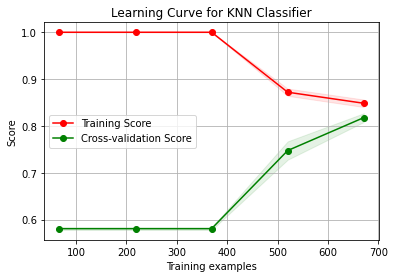

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.78      0.73      0.75        95

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210



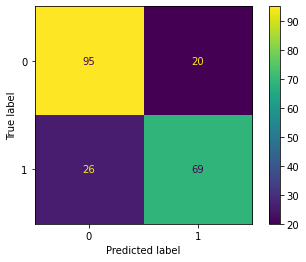

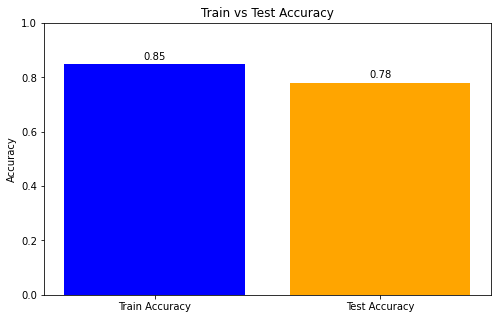

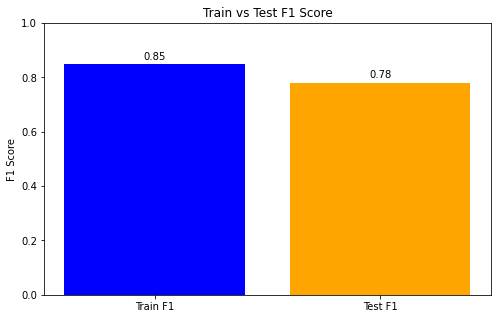

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

##knn_default = KNeighborsClassifier()

##param_grid = {'n_neighbors': np.arange(1, 30)}


##knn = GridSearchCV(knn_default, param_grid, cv=5)


# Initializing the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=8)

# Fitting the classifier on the training data
knn.fit(training_values, training_target)

# Predicting the target values for the testing and training sets
target_pred_test = knn.predict(testing_values)
target_pred_train = knn.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

#best_k = knn.best_params_['n_neighbors']
#print(f"Best k: {best_k}")

# Plot the learning curve
plot_learning_curve(knn, "Learning Curve for KNN Classifier", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()

# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()






## SVM

Support Vector Machines (SVM) are powerful supervised learning algorithms used for classification and regression tasks. They are particularly effective in high-dimensional spaces and are versatile in terms of the kernel functions that can be used to solve non-linear problems. Here, we will be using various types of kernel functions to classify the glioma grading data.

### Linear kernel

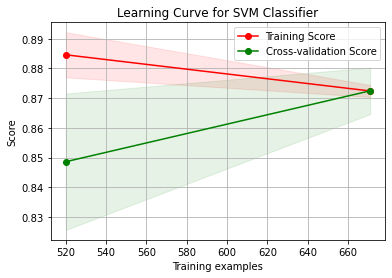

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.82      0.89      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.87      0.86      0.86       210



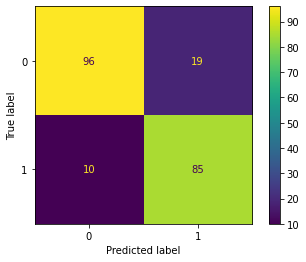

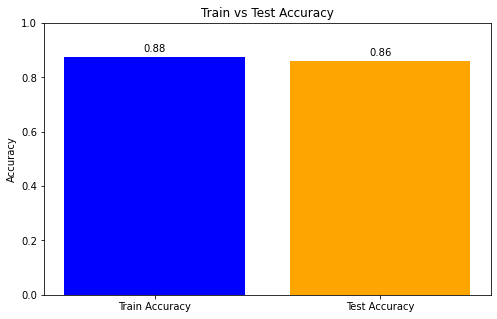

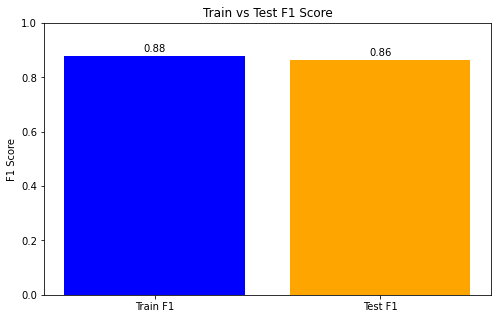

In [10]:
from sklearn.svm import SVC

# Initializing the Support Vector Machine classifier
svm_model = SVC(kernel="linear")

# Fitting the classifier on the training data
svm_model.fit(training_values, training_target)

# coefficients = svm_model.coef_[0]
# coef_names = values.columns
# coefficients = dict(zip(coef_names, coefficients))
# coefficients = {k: v  for k, v in sorted(coefficients.items(), key=lambda item: item[1]) if round(v,3) != 0}
#  print("Coefficients:")
# for(k,v) in coefficients.items():
#    print(f"{k}: {v}")


# Predicting the target values for the testing and training sets
target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

# Plot the learning curve
plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()


# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()


# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()


### Sigmoid kernel

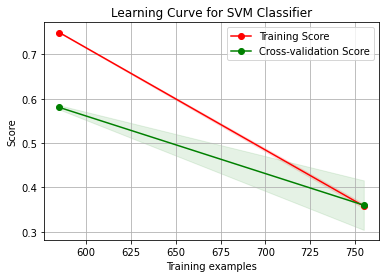

              precision    recall  f1-score   support

           0       0.44      0.53      0.48       115
           1       0.24      0.18      0.20        95

    accuracy                           0.37       210
   macro avg       0.34      0.35      0.34       210
weighted avg       0.35      0.37      0.36       210



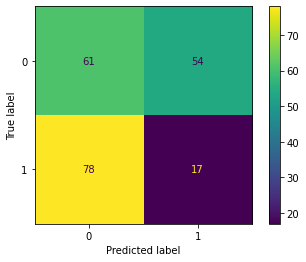

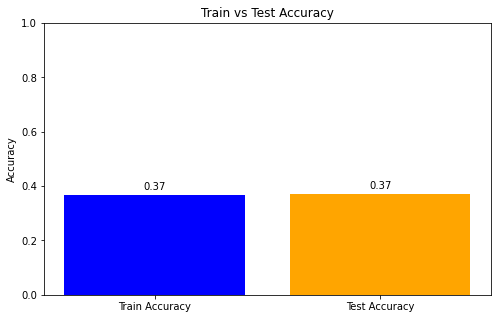

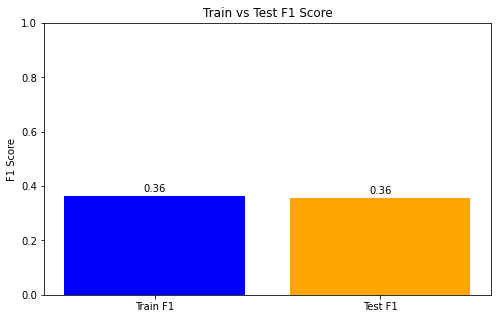

In [11]:
# Initializing the Support Vector Machine classifier
svm_model = SVC(kernel="sigmoid")

# Fitting the classifier on the training data
svm_model.fit(training_values, training_target)

# Predicting the target values for the testing and training sets
target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

# Plot the learning curve
plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot F1 scores
labels = ['Train F1', 'Test F1']    
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()


### Polynomial kernel

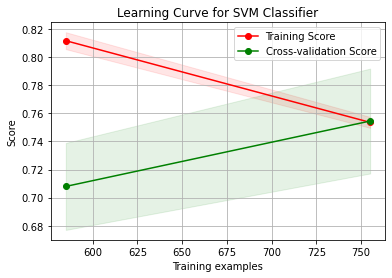

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       115
           1       0.72      0.52      0.60        95

    accuracy                           0.69       210
   macro avg       0.70      0.68      0.67       210
weighted avg       0.70      0.69      0.68       210



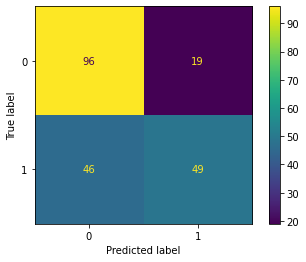

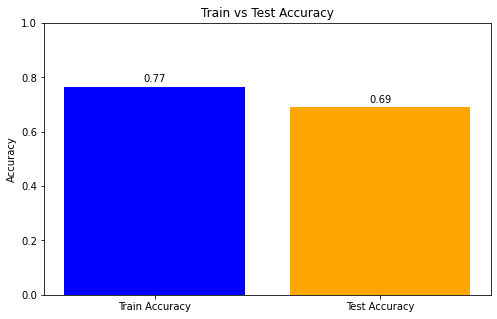

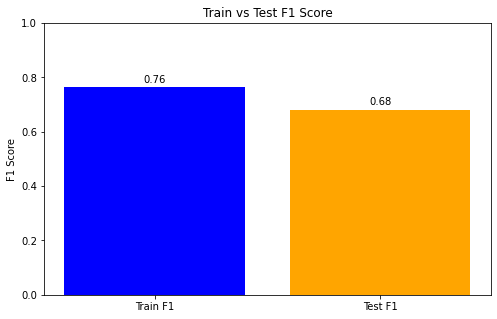

In [12]:
# Initializing the Support Vector Machine classifier
svm_model = SVC(kernel="poly")

# Fitting the classifier on the training data
svm_model.fit(training_values, training_target)

# Predicting the target values for the testing and training sets
target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

# Plot the learning curve
plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()

### Radial Basis Function kernel

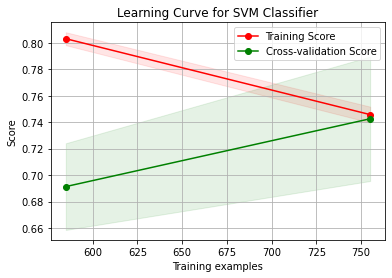

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210



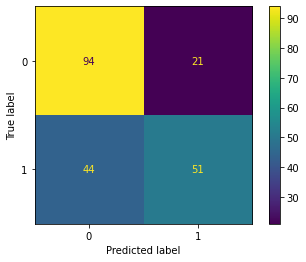

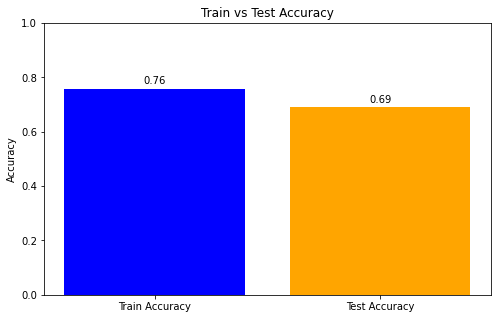

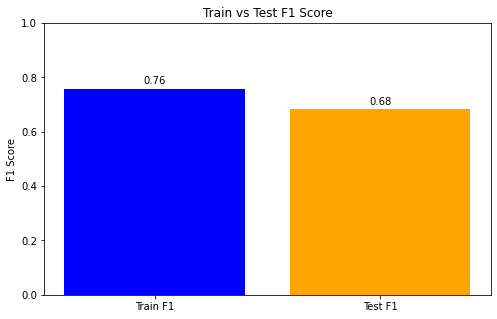

In [13]:
# Initializing the Support Vector Machine classifier
svm_model = SVC(kernel="rbf")

# Fitting the classifier on the training data
svm_model.fit(training_values, training_target)

# Predicting the target values for the testing and training sets
target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)


# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

# Plot the learning curve
plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()


# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()


## Decision trees

A decision tree is a supervised learning model used for both classification and regression tasks. It predicts the value of a target variable by learning simple decision rules inferred from the data features.

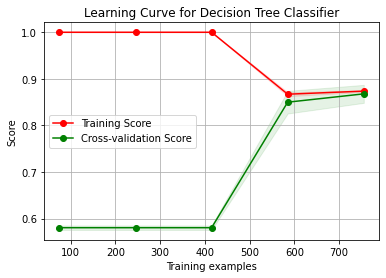

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210



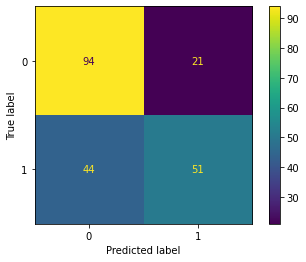

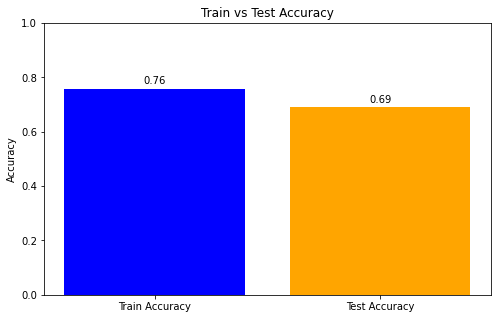

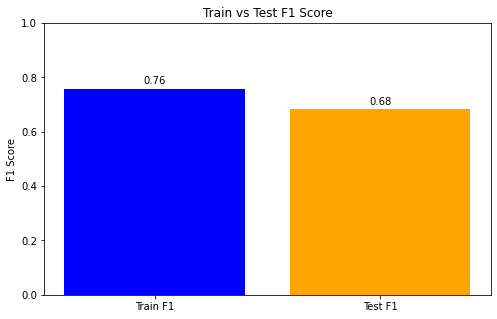

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree classifier
decision_tree = DecisionTreeClassifier(max_depth=3)

#param_grid = {'max_depth': np.arange(1, 10)}

#decision_tree = GridSearchCV(decision_tree_default, param_grid, cv=5)

# Fitting the classifier on the training data
decision_tree.fit(training_values, training_target)

# Predicting the target values for the testing and training sets
target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)


# Calculating the F1 score of the classifier
f1 = f1_score(testing_target, target_pred_test, average='weighted')
f1_train = f1_score(training_target, target_pred_train, average='weighted')

accs.append(accuracy)
f1scores.append(f1)

#print(f"Best max_depth: {decision_tree.best_params_['max_depth']}")

# Plot the learning curve
plot_learning_curve(decision_tree, "Learning Curve for Decision Tree Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


# Display the classification report and confusion matrix
print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()


## Random Forests

Random Forest is an ensemble learning method used for classification, regression, and other tasks. It works by constructing a multitude of decision trees during training and outputting the class (classification) or mean prediction (regression) of the individual trees. Random forests reduce decision trees' habit of overfitting to their training set.

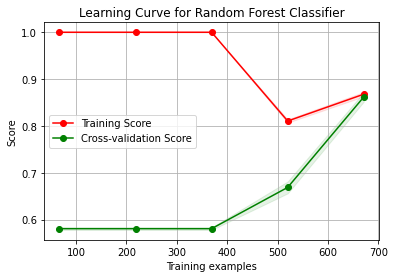

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.81      0.82      0.82        95

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210



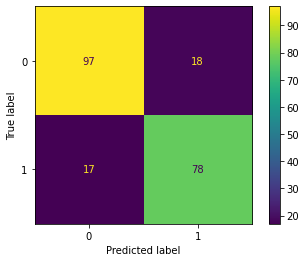

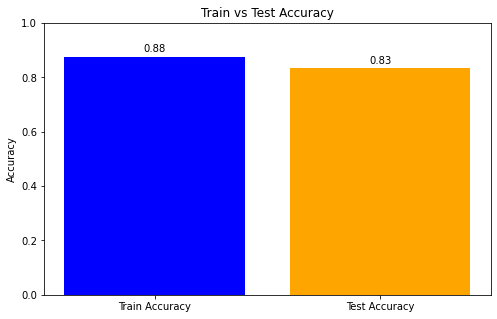

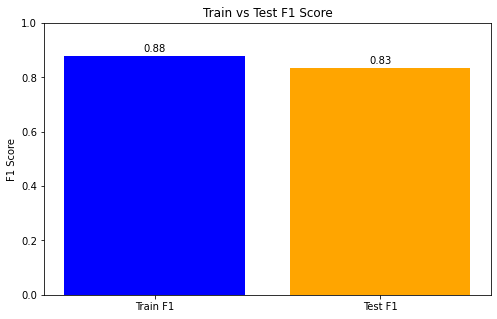

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=1)

# Fit the model
random_forest.fit(training_values, training_target)

# Predict the target values
training_target_pred = random_forest.predict(training_values)
test_target_pred = random_forest.predict(testing_values)

# Plot the learning curve (assuming plot_learning_curve is already defined)
plot_learning_curve(random_forest, "Learning Curve for Random Forest Classifier", values, target, cv=5, n_jobs=-1)
plt.show()

# Calculate accuracies
train_accuracy = accuracy_score(training_target, training_target_pred)
test_accuracy = accuracy_score(testing_target, test_target_pred)


# Calculate F1 scores
f1 = f1_score(testing_target, test_target_pred, average='weighted')
f1_train = f1_score(training_target, training_target_pred, average='weighted')

accs.append(test_accuracy)
f1scores.append(f1)



# Print classification report
print(classification_report(testing_target, test_target_pred))

# Print confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, test_target_pred))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()


# Plot F1 scores
labels = ['Train F1', 'Test F1']
f1_scores = [f1_train, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(labels)):
    plt.text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom')
plt.show()


# Comparing Models

Here we will compare the results of the models we have used to classify the glioma grading data. We will use the metrics accuracy and F1 score to compare the models.

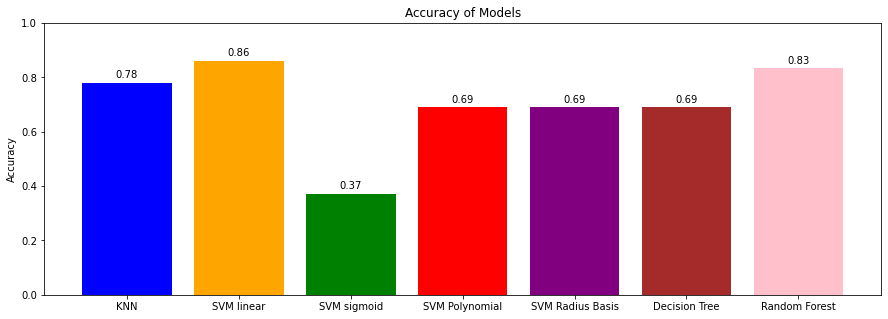

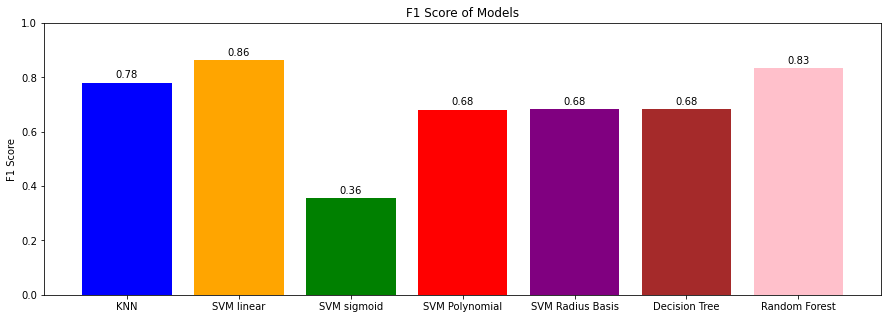

In [16]:
plt.figure(figsize=(15, 5))

# Plot accuracies of the models
plt.bar(['KNN', 'SVM linear','SVM sigmoid','SVM Polynomial','SVM Radius Basis', 'Decision Tree', 'Random Forest'], accs, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(accs)):
    plt.text(i, accs[i] + 0.01, f'{accs[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot F1 scores of the models
plt.figure(figsize=(15, 5))
plt.bar(['KNN', 'SVM linear','SVM sigmoid','SVM Polynomial','SVM Radius Basis', 'Decision Tree', 'Random Forest'], f1scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')
plt.ylim(0, 1)  # F1 scores are between 0 and 1
for i in range(len(f1scores)):
    plt.text(i, f1scores[i] + 0.01, f'{f1scores[i]:.2f}', ha='center', va='bottom')
plt.show()

# Conclusion

Throughout this project, we hava analyzed the glioma grading data, its clinical features(Race,Gender,Age_at_diagnosis) aswell as the genes, checking if they are mutated or not. Using various classification algorithms, K-Nearest Neighbours, Support Vector Machines, Decision Trees, and Random Forests we have classified the data into the different grades of glioma.

After performing the above classification algorithms, we can conclude that Linear SVM is the best model for classifying the glioma grading data. It has the highest accuracy in training and testing data sets and F1 score among all the models. The Random Forest model also performed well, but it is slightly overfitting the testing data. While Sigmoid SVM are not performing well in this case.  This high accuracy of the Linear SVM model can be attributed to the fact that the data is linearly separable as well as the fact that the model is not overfitting the data.

### Dificulties

- Finding what the best parameters for each model were. Once we found the best parameters, we were able to get better results. 
- Understanding what type of data we should be comparing.
